In [1]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses=[]
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset_X = []
    dataset_Y = []
    
    for i in range(len(seq)-window_size):
        
        subset = seq[i:(i+window_size+1)]
        
        for si in range(len(subset)-1):
            features = code2features(subset[si])
            dataset_X.append(features)
        
        dataset_Y.append([code2idx[subset[window_size]]])
        
    return np. array(dataset_X), np.array(dataset_Y)

# 속성 변환 함수
def code2features(code):
    features = []
    features.append(code2scale[code[0]]/float(max_scale_value))
    features.append(code2length[code[1]])
    return features

Using TensorFlow backend.


In [2]:
# 1. 데이터 준비하기

# 코드 사전 정의

code2scale = {'c':0, 'd':1, 'e':2, 'f':3, 'g':4, 'a':5, 'b':6}
code2length = {'4':0, '8':1}

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a5', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

max_scale_value = 6.0

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [3]:
# 2. 데이터셋 생성하기

x_train, y_train = seq2dataset(seq, window_size=4)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 2))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  12


In [4]:
# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 2), stateful = True)) # 상태유지(Stateful)
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [5]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성
history.init()

for epoch_idx in range(num_epochs):
    print('epochs : ' + str(epoch_idx))
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()

epochs : 0
Epoch 1/1
 - 2s - loss: 2.3090 - acc: 0.1400
epochs : 1
Epoch 1/1
 - 0s - loss: 2.0178 - acc: 0.3400
epochs : 2
Epoch 1/1
 - 0s - loss: 1.9620 - acc: 0.3400
epochs : 3
Epoch 1/1
 - 0s - loss: 1.9461 - acc: 0.3400
epochs : 4
Epoch 1/1
 - 0s - loss: 1.9359 - acc: 0.3400
epochs : 5
Epoch 1/1
 - 0s - loss: 1.9284 - acc: 0.3400
epochs : 6
Epoch 1/1
 - 0s - loss: 1.9224 - acc: 0.3400
epochs : 7
Epoch 1/1
 - 0s - loss: 1.9172 - acc: 0.3400
epochs : 8
Epoch 1/1
 - 0s - loss: 1.9123 - acc: 0.3400
epochs : 9
Epoch 1/1
 - 0s - loss: 1.9075 - acc: 0.3600
epochs : 10
Epoch 1/1
 - 0s - loss: 1.9020 - acc: 0.3600
epochs : 11
Epoch 1/1
 - 0s - loss: 1.8946 - acc: 0.3600
epochs : 12
Epoch 1/1
 - 0s - loss: 1.8828 - acc: 0.3600
epochs : 13
Epoch 1/1
 - 0s - loss: 1.8688 - acc: 0.3600
epochs : 14
Epoch 1/1
 - 0s - loss: 1.8548 - acc: 0.3600
epochs : 15
Epoch 1/1
 - 0s - loss: 1.8397 - acc: 0.3600
epochs : 16
Epoch 1/1
 - 0s - loss: 1.8227 - acc: 0.3600
epochs : 17
Epoch 1/1
 - 0s - loss: 1.789

 - 0s - loss: 0.4818 - acc: 0.8800
epochs : 144
Epoch 1/1
 - 0s - loss: 0.3068 - acc: 0.9200
epochs : 145
Epoch 1/1
 - 0s - loss: 0.3052 - acc: 0.9600
epochs : 146
Epoch 1/1
 - 0s - loss: 0.2038 - acc: 0.9600
epochs : 147
Epoch 1/1
 - 0s - loss: 0.1843 - acc: 0.9800
epochs : 148
Epoch 1/1
 - 0s - loss: 0.0829 - acc: 1.0000
epochs : 149
Epoch 1/1
 - 0s - loss: 0.0599 - acc: 1.0000
epochs : 150
Epoch 1/1
 - 0s - loss: 0.0414 - acc: 1.0000
epochs : 151
Epoch 1/1
 - 0s - loss: 0.0333 - acc: 1.0000
epochs : 152
Epoch 1/1
 - 0s - loss: 0.0302 - acc: 1.0000
epochs : 153
Epoch 1/1
 - 0s - loss: 0.0257 - acc: 1.0000
epochs : 154
Epoch 1/1
 - 0s - loss: 0.0226 - acc: 1.0000
epochs : 155
Epoch 1/1
 - 0s - loss: 0.0204 - acc: 1.0000
epochs : 156
Epoch 1/1
 - 0s - loss: 0.0183 - acc: 1.0000
epochs : 157
Epoch 1/1
 - 0s - loss: 0.0166 - acc: 1.0000
epochs : 158
Epoch 1/1
 - 0s - loss: 0.0152 - acc: 1.0000
epochs : 159
Epoch 1/1
 - 0s - loss: 0.0140 - acc: 1.0000
epochs : 160
Epoch 1/1
 - 0s - loss: 

epochs : 281
Epoch 1/1
 - 0s - loss: 1.9940e-04 - acc: 1.0000
epochs : 282
Epoch 1/1
 - 0s - loss: 2.0262e-04 - acc: 1.0000
epochs : 283
Epoch 1/1
 - 0s - loss: 1.8365e-04 - acc: 1.0000
epochs : 284
Epoch 1/1
 - 0s - loss: 2.0005e-04 - acc: 1.0000
epochs : 285
Epoch 1/1
 - 0s - loss: 1.7374e-04 - acc: 1.0000
epochs : 286
Epoch 1/1
 - 0s - loss: 1.8343e-04 - acc: 1.0000
epochs : 287
Epoch 1/1
 - 0s - loss: 1.6436e-04 - acc: 1.0000
epochs : 288
Epoch 1/1
 - 0s - loss: 1.7093e-04 - acc: 1.0000
epochs : 289
Epoch 1/1
 - 0s - loss: 1.5707e-04 - acc: 1.0000
epochs : 290
Epoch 1/1
 - 0s - loss: 1.5724e-04 - acc: 1.0000
epochs : 291
Epoch 1/1
 - 0s - loss: 1.4886e-04 - acc: 1.0000
epochs : 292
Epoch 1/1
 - 0s - loss: 1.4580e-04 - acc: 1.0000
epochs : 293
Epoch 1/1
 - 0s - loss: 1.4297e-04 - acc: 1.0000
epochs : 294
Epoch 1/1
 - 0s - loss: 1.3414e-04 - acc: 1.0000
epochs : 295
Epoch 1/1
 - 0s - loss: 1.3658e-04 - acc: 1.0000
epochs : 296
Epoch 1/1
 - 0s - loss: 1.2530e-04 - acc: 1.0000
epochs :

 - 0s - loss: 7.8362e-04 - acc: 1.0000
epochs : 420
Epoch 1/1
 - 0s - loss: 7.5928e-04 - acc: 1.0000
epochs : 421
Epoch 1/1
 - 0s - loss: 7.3665e-04 - acc: 1.0000
epochs : 422
Epoch 1/1
 - 0s - loss: 7.1820e-04 - acc: 1.0000
epochs : 423
Epoch 1/1
 - 0s - loss: 6.9373e-04 - acc: 1.0000
epochs : 424
Epoch 1/1
 - 0s - loss: 6.7798e-04 - acc: 1.0000
epochs : 425
Epoch 1/1
 - 0s - loss: 6.4071e-04 - acc: 1.0000
epochs : 426
Epoch 1/1
 - 0s - loss: 6.4633e-04 - acc: 1.0000
epochs : 427
Epoch 1/1
 - 0s - loss: 6.2882e-04 - acc: 1.0000
epochs : 428
Epoch 1/1
 - 0s - loss: 6.0639e-04 - acc: 1.0000
epochs : 429
Epoch 1/1
 - 0s - loss: 5.9244e-04 - acc: 1.0000
epochs : 430
Epoch 1/1
 - 0s - loss: 5.6255e-04 - acc: 1.0000
epochs : 431
Epoch 1/1
 - 0s - loss: 5.7652e-04 - acc: 1.0000
epochs : 432
Epoch 1/1
 - 0s - loss: 5.6858e-04 - acc: 1.0000
epochs : 433
Epoch 1/1
 - 0s - loss: 5.0842e-04 - acc: 1.0000
epochs : 434
Epoch 1/1
 - 0s - loss: 5.0454e-04 - acc: 1.0000
epochs : 435
Epoch 1/1
 - 0s - 

epochs : 558
Epoch 1/1
 - 0s - loss: 0.0127 - acc: 1.0000
epochs : 559
Epoch 1/1
 - 0s - loss: 0.0117 - acc: 1.0000
epochs : 560
Epoch 1/1
 - 0s - loss: 0.0107 - acc: 1.0000
epochs : 561
Epoch 1/1
 - 0s - loss: 0.0101 - acc: 1.0000
epochs : 562
Epoch 1/1
 - 0s - loss: 0.0095 - acc: 1.0000
epochs : 563
Epoch 1/1
 - 0s - loss: 0.0090 - acc: 1.0000
epochs : 564
Epoch 1/1
 - 0s - loss: 0.0085 - acc: 1.0000
epochs : 565
Epoch 1/1
 - 0s - loss: 0.0081 - acc: 1.0000
epochs : 566
Epoch 1/1
 - 0s - loss: 0.0077 - acc: 1.0000
epochs : 567
Epoch 1/1
 - 0s - loss: 0.0072 - acc: 1.0000
epochs : 568
Epoch 1/1
 - 0s - loss: 0.0068 - acc: 1.0000
epochs : 569
Epoch 1/1
 - 0s - loss: 0.0067 - acc: 1.0000
epochs : 570
Epoch 1/1
 - 0s - loss: 0.0062 - acc: 1.0000
epochs : 571
Epoch 1/1
 - 0s - loss: 0.0059 - acc: 1.0000
epochs : 572
Epoch 1/1
 - 0s - loss: 0.0057 - acc: 1.0000
epochs : 573
Epoch 1/1
 - 0s - loss: 0.0055 - acc: 1.0000
epochs : 574
Epoch 1/1
 - 0s - loss: 0.0052 - acc: 1.0000
epochs : 575
E

 - 0s - loss: 6.0665e-04 - acc: 1.0000
epochs : 699
Epoch 1/1
 - 0s - loss: 5.9351e-04 - acc: 1.0000
epochs : 700
Epoch 1/1
 - 0s - loss: 5.6947e-04 - acc: 1.0000
epochs : 701
Epoch 1/1
 - 0s - loss: 5.4595e-04 - acc: 1.0000
epochs : 702
Epoch 1/1
 - 0s - loss: 5.2810e-04 - acc: 1.0000
epochs : 703
Epoch 1/1
 - 0s - loss: 5.1080e-04 - acc: 1.0000
epochs : 704
Epoch 1/1
 - 0s - loss: 4.9702e-04 - acc: 1.0000
epochs : 705
Epoch 1/1
 - 0s - loss: 4.8604e-04 - acc: 1.0000
epochs : 706
Epoch 1/1
 - 0s - loss: 4.6938e-04 - acc: 1.0000
epochs : 707
Epoch 1/1
 - 0s - loss: 4.5544e-04 - acc: 1.0000
epochs : 708
Epoch 1/1
 - 0s - loss: 4.4082e-04 - acc: 1.0000
epochs : 709
Epoch 1/1
 - 0s - loss: 4.3339e-04 - acc: 1.0000
epochs : 710
Epoch 1/1
 - 0s - loss: 4.2750e-04 - acc: 1.0000
epochs : 711
Epoch 1/1
 - 0s - loss: 4.2090e-04 - acc: 1.0000
epochs : 712
Epoch 1/1
 - 0s - loss: 4.2594e-04 - acc: 1.0000
epochs : 713
Epoch 1/1
 - 0s - loss: 4.2835e-04 - acc: 1.0000
epochs : 714
Epoch 1/1
 - 0s - 

epochs : 836
Epoch 1/1
 - 0s - loss: 2.3398e-04 - acc: 1.0000
epochs : 837
Epoch 1/1
 - 0s - loss: 2.2534e-04 - acc: 1.0000
epochs : 838
Epoch 1/1
 - 0s - loss: 2.1804e-04 - acc: 1.0000
epochs : 839
Epoch 1/1
 - 0s - loss: 2.1058e-04 - acc: 1.0000
epochs : 840
Epoch 1/1
 - 0s - loss: 2.0392e-04 - acc: 1.0000
epochs : 841
Epoch 1/1
 - 0s - loss: 1.9840e-04 - acc: 1.0000
epochs : 842
Epoch 1/1
 - 0s - loss: 1.9312e-04 - acc: 1.0000
epochs : 843
Epoch 1/1
 - 0s - loss: 1.8761e-04 - acc: 1.0000
epochs : 844
Epoch 1/1
 - 0s - loss: 1.8209e-04 - acc: 1.0000
epochs : 845
Epoch 1/1
 - 0s - loss: 1.7673e-04 - acc: 1.0000
epochs : 846
Epoch 1/1
 - 0s - loss: 1.7191e-04 - acc: 1.0000
epochs : 847
Epoch 1/1
 - 0s - loss: 1.6862e-04 - acc: 1.0000
epochs : 848
Epoch 1/1
 - 0s - loss: 1.6361e-04 - acc: 1.0000
epochs : 849
Epoch 1/1
 - 0s - loss: 1.5918e-04 - acc: 1.0000
epochs : 850
Epoch 1/1
 - 0s - loss: 1.5441e-04 - acc: 1.0000
epochs : 851
Epoch 1/1
 - 0s - loss: 1.4985e-04 - acc: 1.0000
epochs :

 - 0s - loss: 6.4576e-06 - acc: 1.0000
epochs : 969
Epoch 1/1
 - 0s - loss: 6.2549e-06 - acc: 1.0000
epochs : 970
Epoch 1/1
 - 0s - loss: 6.1620e-06 - acc: 1.0000
epochs : 971
Epoch 1/1
 - 0s - loss: 6.0058e-06 - acc: 1.0000
epochs : 972
Epoch 1/1
 - 0s - loss: 5.8317e-06 - acc: 1.0000
epochs : 973
Epoch 1/1
 - 0s - loss: 5.7698e-06 - acc: 1.0000
epochs : 974
Epoch 1/1
 - 0s - loss: 5.5409e-06 - acc: 1.0000
epochs : 975
Epoch 1/1
 - 0s - loss: 5.5170e-06 - acc: 1.0000
epochs : 976
Epoch 1/1
 - 0s - loss: 5.3239e-06 - acc: 1.0000
epochs : 977
Epoch 1/1
 - 0s - loss: 5.2476e-06 - acc: 1.0000
epochs : 978
Epoch 1/1
 - 0s - loss: 5.1022e-06 - acc: 1.0000
epochs : 979
Epoch 1/1
 - 0s - loss: 5.0485e-06 - acc: 1.0000
epochs : 980
Epoch 1/1
 - 0s - loss: 4.9150e-06 - acc: 1.0000
epochs : 981
Epoch 1/1
 - 0s - loss: 4.8149e-06 - acc: 1.0000
epochs : 982
Epoch 1/1
 - 0s - loss: 4.8530e-06 - acc: 1.0000
epochs : 983
Epoch 1/1
 - 0s - loss: 4.5824e-06 - acc: 1.0000
epochs : 984
Epoch 1/1
 - 0s - 

epochs : 1103
Epoch 1/1
 - 0s - loss: 2.4493e-04 - acc: 1.0000
epochs : 1104
Epoch 1/1
 - 0s - loss: 2.3827e-04 - acc: 1.0000
epochs : 1105
Epoch 1/1
 - 0s - loss: 2.3166e-04 - acc: 1.0000
epochs : 1106
Epoch 1/1
 - 0s - loss: 2.2541e-04 - acc: 1.0000
epochs : 1107
Epoch 1/1
 - 0s - loss: 2.1914e-04 - acc: 1.0000
epochs : 1108
Epoch 1/1
 - 0s - loss: 2.1332e-04 - acc: 1.0000
epochs : 1109
Epoch 1/1
 - 0s - loss: 2.0740e-04 - acc: 1.0000
epochs : 1110
Epoch 1/1
 - 0s - loss: 2.0167e-04 - acc: 1.0000
epochs : 1111
Epoch 1/1
 - 0s - loss: 1.9631e-04 - acc: 1.0000
epochs : 1112
Epoch 1/1
 - 0s - loss: 1.9113e-04 - acc: 1.0000
epochs : 1113
Epoch 1/1
 - 0s - loss: 1.8595e-04 - acc: 1.0000
epochs : 1114
Epoch 1/1
 - 0s - loss: 1.8109e-04 - acc: 1.0000
epochs : 1115
Epoch 1/1
 - 0s - loss: 1.7631e-04 - acc: 1.0000
epochs : 1116
Epoch 1/1
 - 0s - loss: 1.7163e-04 - acc: 1.0000
epochs : 1117
Epoch 1/1
 - 0s - loss: 1.6712e-04 - acc: 1.0000
epochs : 1118
Epoch 1/1
 - 0s - loss: 1.6277e-04 - acc:

 - 0s - loss: 0.5816 - acc: 0.8200
epochs : 1235
Epoch 1/1
 - 0s - loss: 0.2340 - acc: 0.9600
epochs : 1236
Epoch 1/1
 - 0s - loss: 0.2156 - acc: 0.9600
epochs : 1237
Epoch 1/1
 - 0s - loss: 0.5775 - acc: 0.8000
epochs : 1238
Epoch 1/1
 - 0s - loss: 0.4479 - acc: 0.8600
epochs : 1239
Epoch 1/1
 - 0s - loss: 0.5281 - acc: 0.8000
epochs : 1240
Epoch 1/1
 - 0s - loss: 0.3762 - acc: 0.8000
epochs : 1241
Epoch 1/1
 - 0s - loss: 0.2005 - acc: 0.9400
epochs : 1242
Epoch 1/1
 - 0s - loss: 0.1044 - acc: 0.9800
epochs : 1243
Epoch 1/1
 - 0s - loss: 0.0684 - acc: 1.0000
epochs : 1244
Epoch 1/1
 - 0s - loss: 0.0475 - acc: 1.0000
epochs : 1245
Epoch 1/1
 - 0s - loss: 0.0401 - acc: 1.0000
epochs : 1246
Epoch 1/1
 - 0s - loss: 0.0324 - acc: 1.0000
epochs : 1247
Epoch 1/1
 - 0s - loss: 0.0313 - acc: 1.0000
epochs : 1248
Epoch 1/1
 - 0s - loss: 0.0254 - acc: 1.0000
epochs : 1249
Epoch 1/1
 - 0s - loss: 0.0252 - acc: 1.0000
epochs : 1250
Epoch 1/1
 - 0s - loss: 0.0202 - acc: 1.0000
epochs : 1251
Epoch 1

 - 0s - loss: 6.6139e-04 - acc: 1.0000
epochs : 1373
Epoch 1/1
 - 0s - loss: 6.4308e-04 - acc: 1.0000
epochs : 1374
Epoch 1/1
 - 0s - loss: 6.1179e-04 - acc: 1.0000
epochs : 1375
Epoch 1/1
 - 0s - loss: 5.8383e-04 - acc: 1.0000
epochs : 1376
Epoch 1/1
 - 0s - loss: 5.6070e-04 - acc: 1.0000
epochs : 1377
Epoch 1/1
 - 0s - loss: 5.4018e-04 - acc: 1.0000
epochs : 1378
Epoch 1/1
 - 0s - loss: 5.2090e-04 - acc: 1.0000
epochs : 1379
Epoch 1/1
 - 0s - loss: 5.0280e-04 - acc: 1.0000
epochs : 1380
Epoch 1/1
 - 0s - loss: 4.8371e-04 - acc: 1.0000
epochs : 1381
Epoch 1/1
 - 0s - loss: 4.6567e-04 - acc: 1.0000
epochs : 1382
Epoch 1/1
 - 0s - loss: 4.4810e-04 - acc: 1.0000
epochs : 1383
Epoch 1/1
 - 0s - loss: 4.3198e-04 - acc: 1.0000
epochs : 1384
Epoch 1/1
 - 0s - loss: 4.1856e-04 - acc: 1.0000
epochs : 1385
Epoch 1/1
 - 0s - loss: 4.0349e-04 - acc: 1.0000
epochs : 1386
Epoch 1/1
 - 0s - loss: 3.9136e-04 - acc: 1.0000
epochs : 1387
Epoch 1/1
 - 0s - loss: 3.8052e-04 - acc: 1.0000
epochs : 1388
Ep

epochs : 1510
Epoch 1/1
 - 0s - loss: 0.2813 - acc: 0.9200
epochs : 1511
Epoch 1/1
 - 0s - loss: 0.1855 - acc: 0.9600
epochs : 1512
Epoch 1/1
 - 0s - loss: 0.2631 - acc: 0.9200
epochs : 1513
Epoch 1/1
 - 0s - loss: 0.1312 - acc: 0.9600
epochs : 1514
Epoch 1/1
 - 0s - loss: 0.0730 - acc: 1.0000
epochs : 1515
Epoch 1/1
 - 0s - loss: 0.0431 - acc: 1.0000
epochs : 1516
Epoch 1/1
 - 0s - loss: 0.0235 - acc: 1.0000
epochs : 1517
Epoch 1/1
 - 0s - loss: 0.0304 - acc: 1.0000
epochs : 1518
Epoch 1/1
 - 0s - loss: 0.0341 - acc: 1.0000
epochs : 1519
Epoch 1/1
 - 0s - loss: 0.0238 - acc: 1.0000
epochs : 1520
Epoch 1/1
 - 0s - loss: 0.0156 - acc: 1.0000
epochs : 1521
Epoch 1/1
 - 0s - loss: 0.0144 - acc: 1.0000
epochs : 1522
Epoch 1/1
 - 0s - loss: 0.0103 - acc: 1.0000
epochs : 1523
Epoch 1/1
 - 0s - loss: 0.0082 - acc: 1.0000
epochs : 1524
Epoch 1/1
 - 0s - loss: 0.0072 - acc: 1.0000
epochs : 1525
Epoch 1/1
 - 0s - loss: 0.0064 - acc: 1.0000
epochs : 1526
Epoch 1/1
 - 0s - loss: 0.0059 - acc: 1.00

epochs : 1648
Epoch 1/1
 - 0s - loss: 7.3120e-04 - acc: 1.0000
epochs : 1649
Epoch 1/1
 - 0s - loss: 6.9365e-04 - acc: 1.0000
epochs : 1650
Epoch 1/1
 - 0s - loss: 6.5956e-04 - acc: 1.0000
epochs : 1651
Epoch 1/1
 - 0s - loss: 6.2562e-04 - acc: 1.0000
epochs : 1652
Epoch 1/1
 - 0s - loss: 5.9541e-04 - acc: 1.0000
epochs : 1653
Epoch 1/1
 - 0s - loss: 5.6647e-04 - acc: 1.0000
epochs : 1654
Epoch 1/1
 - 0s - loss: 5.4077e-04 - acc: 1.0000
epochs : 1655
Epoch 1/1
 - 0s - loss: 5.1730e-04 - acc: 1.0000
epochs : 1656
Epoch 1/1
 - 0s - loss: 4.9505e-04 - acc: 1.0000
epochs : 1657
Epoch 1/1
 - 0s - loss: 4.7754e-04 - acc: 1.0000
epochs : 1658
Epoch 1/1
 - 0s - loss: 4.6185e-04 - acc: 1.0000
epochs : 1659
Epoch 1/1
 - 0s - loss: 4.4752e-04 - acc: 1.0000
epochs : 1660
Epoch 1/1
 - 0s - loss: 4.3449e-04 - acc: 1.0000
epochs : 1661
Epoch 1/1
 - 0s - loss: 4.2427e-04 - acc: 1.0000
epochs : 1662
Epoch 1/1
 - 0s - loss: 4.1379e-04 - acc: 1.0000
epochs : 1663
Epoch 1/1
 - 0s - loss: 4.0348e-04 - acc:

 - 0s - loss: 2.2489e-05 - acc: 1.0000
epochs : 1779
Epoch 1/1
 - 0s - loss: 2.0180e-05 - acc: 1.0000
epochs : 1780
Epoch 1/1
 - 0s - loss: 3.7107e-04 - acc: 1.0000
epochs : 1781
Epoch 1/1
 - 0s - loss: 0.7673 - acc: 0.7800
epochs : 1782
Epoch 1/1
 - 0s - loss: 1.2230 - acc: 0.7800
epochs : 1783
Epoch 1/1
 - 0s - loss: 1.0563 - acc: 0.8000
epochs : 1784
Epoch 1/1
 - 0s - loss: 1.3221 - acc: 0.6600
epochs : 1785
Epoch 1/1
 - 0s - loss: 0.9731 - acc: 0.7200
epochs : 1786
Epoch 1/1
 - 0s - loss: 0.4278 - acc: 0.7800
epochs : 1787
Epoch 1/1
 - 0s - loss: 0.2186 - acc: 0.9400
epochs : 1788
Epoch 1/1
 - 0s - loss: 0.1645 - acc: 0.9600
epochs : 1789
Epoch 1/1
 - 0s - loss: 0.0796 - acc: 1.0000
epochs : 1790
Epoch 1/1
 - 0s - loss: 0.0644 - acc: 1.0000
epochs : 1791
Epoch 1/1
 - 0s - loss: 0.0380 - acc: 1.0000
epochs : 1792
Epoch 1/1
 - 0s - loss: 0.0316 - acc: 1.0000
epochs : 1793
Epoch 1/1
 - 0s - loss: 0.0237 - acc: 1.0000
epochs : 1794
Epoch 1/1
 - 0s - loss: 0.0196 - acc: 1.0000
epochs : 

epochs : 1913
Epoch 1/1
 - 0s - loss: 1.6790e-04 - acc: 1.0000
epochs : 1914
Epoch 1/1
 - 0s - loss: 1.6237e-04 - acc: 1.0000
epochs : 1915
Epoch 1/1
 - 0s - loss: 1.5439e-04 - acc: 1.0000
epochs : 1916
Epoch 1/1
 - 0s - loss: 1.4764e-04 - acc: 1.0000
epochs : 1917
Epoch 1/1
 - 0s - loss: 1.4150e-04 - acc: 1.0000
epochs : 1918
Epoch 1/1
 - 0s - loss: 1.3571e-04 - acc: 1.0000
epochs : 1919
Epoch 1/1
 - 0s - loss: 1.3182e-04 - acc: 1.0000
epochs : 1920
Epoch 1/1
 - 0s - loss: 1.2930e-04 - acc: 1.0000
epochs : 1921
Epoch 1/1
 - 0s - loss: 1.2698e-04 - acc: 1.0000
epochs : 1922
Epoch 1/1
 - 0s - loss: 1.2462e-04 - acc: 1.0000
epochs : 1923
Epoch 1/1
 - 0s - loss: 1.2316e-04 - acc: 1.0000
epochs : 1924
Epoch 1/1
 - 0s - loss: 1.2155e-04 - acc: 1.0000
epochs : 1925
Epoch 1/1
 - 0s - loss: 1.2002e-04 - acc: 1.0000
epochs : 1926
Epoch 1/1
 - 0s - loss: 1.1791e-04 - acc: 1.0000
epochs : 1927
Epoch 1/1
 - 0s - loss: 1.1586e-04 - acc: 1.0000
epochs : 1928
Epoch 1/1
 - 0s - loss: 1.1326e-04 - acc:

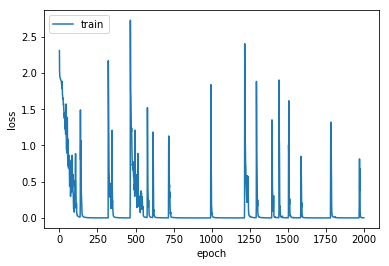

In [7]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [8]:
# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

50/50 [==============================] - 0s 4ms/step
acc: 100.00%


In [9]:
# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

print("one step prediction : ", seq_out)

model.reset_states()

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in

seq_in_featrues = []

for si in seq_in:
    features = code2features(si)
    seq_in_featrues.append(features)

for i in range(pred_count):
    sample_in = np.array(seq_in_featrues)
    sample_in = np.reshape(sample_in, (1, 4, 2)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    
    features = code2features(idx2code[idx])
    seq_in_featrues.append(features)
    seq_in_featrues.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
